In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Loading training and testing dataset to pandas dataframe

In [2]:
train_path = "/kaggle/input/sales-analysis/time-series/SCRM_timeSeries_2018_train.csv"
df_train = pd.read_csv(train_path)

test_path = "/kaggle/input/sales-analysis/time-series/SCRM_timeSeries_2018_test.csv"
df_test = pd.read_csv(test_path)

# Printing first 5 rows

In [3]:
df_train.head()

,Timestamp,RI_Supplier1,RI_Distributor1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
0,02/09/2018 12:44:39 PM,1.6396,1.0422,3.1884,3.3609,133.06,4
1,02/09/2018 12:46:39 PM,1.6399,1.0444,3.1877,3.3642,135.02,4
2,02/09/2018 12:48:39 PM,1.6398,1.0422,3.1880,3.3676,135.36,4
3,02/09/2018 12:50:39 PM,1.6403,1.0356,3.1877,3.3705,136.22,4
4,02/09/2018 12:52:39 PM,1.6396,1.0595,3.1888,3.3731,136.48,4


In [4]:
df_test.head()

,Timestamp,RI_Supplier1,RI_Distributor1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
0,12/08/2016 5:42:06 AM,1.7319,NaN,1.3215,2.1278,-1.18,2
1,12/08/2016 5:44:06 AM,1.7319,NaN,1.3106,2.1267,-1.18,2
2,12/08/2016 5:46:06 AM,1.7320,NaN,1.3161,2.1274,-1.18,2
3,12/08/2016 5:48:06 AM,1.7319,NaN,1.3322,2.1263,-1.18,2
4,12/08/2016 5:50:06 AM,1.7320,NaN,1.3296,2.1271,-1.18,2


# Training features datatypes

In [5]:
print("\nSummary of the training dataset:")
print(df_train.info())




Summary of the training dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649999 entries, 0 to 649998
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Timestamp              649999 non-null  object 
 1   RI_Supplier1           649971 non-null  float64
 2   RI_Distributor1        616624 non-null  float64
 3   RI_Manufacturer1       649817 non-null  float64
 4   RI_Retailer1           649841 non-null  float64
 5   Total_Cost             614518 non-null  float64
 6   SCMstability_category  649999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.7+ MB
None


# Testing features datatypes

In [6]:
print("\nSummary of the testing dataset:")
print(df_test.info())


Summary of the testing dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Timestamp              150001 non-null  object 
 1   RI_Supplier1           149989 non-null  float64
 2   RI_Distributor1        139000 non-null  float64
 3   RI_Manufacturer1       149967 non-null  float64
 4   RI_Retailer1           149965 non-null  float64
 5   Total_Cost             149994 non-null  float64
 6   SCMstability_category  150001 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.0+ MB
None


# Descriptive Statistics

In [7]:
print("\nBasic statistics of the training dataset:")
print(df_train.describe())




Basic statistics of the training dataset:
        RI_Supplier1  RI_Distributor1  RI_Manufacturer1  RI_Retailer1  \
count  649971.000000    616624.000000     649817.000000  649841.00000   
mean        1.703540         2.437000          2.636818       2.40415   
std         0.043519         0.686327          1.142302       0.24444   
min         0.000000         0.000000          1.251100       1.00000   
25%         1.686200         2.205200          1.337500       2.18360   
50%         1.691900         2.456100          3.176400       2.46780   
75%         1.709100         2.921900          3.609000       2.46960   
max         2.036800         6.371600          4.725300       3.42880   

          Total_Cost  SCMstability_category  
count  614518.000000          649999.000000  
mean       87.171639               1.713426  
std        76.099732               1.026290  
min       -23.940000               0.000000  
25%         0.238500               1.000000  
50%       139.080000   

In [8]:
print("\nBasic statistics of the testing dataset:")
print(df_test.describe())




Basic statistics of the testing dataset:
        RI_Supplier1  RI_Distributor1  RI_Manufacturer1   RI_Retailer1  \
count  149989.000000    139000.000000     149967.000000  149965.000000   
mean        1.707075         2.325443          2.679723       2.378669   
std         0.047704         0.770697          1.147432       0.271871   
min         0.933800         0.000000          1.275900       1.712700   
25%         1.684100         1.986700          1.342700       2.156100   
50%         1.692700         2.450500          3.189200       2.467600   
75%         1.709500         2.911200          3.640650       2.468800   
max         7.566400         6.339200          4.726300       3.425600   

          Total_Cost  SCMstability_category  
count  149994.000000          150001.000000  
mean       88.752551               1.519090  
std        78.139663               1.070774  
min       -18.400000               0.000000  
25%        -0.220000               1.000000  
50%       139.0

# Checking Missing Values

In [9]:
print("\nMissing values in the training dataset:")
print(df_train.isnull().sum())




Missing values in the training dataset:
Timestamp                    0
RI_Supplier1                28
RI_Distributor1          33375
RI_Manufacturer1           182
RI_Retailer1               158
Total_Cost               35481
SCMstability_category        0
dtype: int64


In [10]:
print("\nMissing values in the testing dataset:")
print(df_test.isnull().sum())


Missing values in the testing dataset:
Timestamp                    0
RI_Supplier1                12
RI_Distributor1          11001
RI_Manufacturer1            34
RI_Retailer1                36
Total_Cost                   7
SCMstability_category        0
dtype: int64


# Converting timestamp feature to data time

In [11]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'], errors='coerce')
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'], errors='coerce')

df_train.dropna(subset=['Timestamp'], inplace=True)
df_test.dropna(subset=['Timestamp'], inplace=True)

df_train.set_index('Timestamp', inplace=True)
df_test.set_index('Timestamp', inplace=True)

# Filling mising values with mean of columns

In [12]:
for column in df_train.columns:
    df_train[column].fillna(df_train[column].mean(), inplace=True)

print("\nMissing values in the dataset after filling missing values:")
print(df_train.isnull().sum())


Missing values in the dataset after filling missing values:
RI_Supplier1             0
RI_Distributor1          0
RI_Manufacturer1         0
RI_Retailer1             0
Total_Cost               0
SCMstability_category    0
dtype: int64


/tmp/ipykernel_33/4284976039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].mean(), inplace=True)


In [13]:
for column in df_test.columns:
    df_test[column].fillna(df_test[column].mean(), inplace=True)

print("\nMissing values in the dataset after filling missing values:")
print(df_test.isnull().sum())


Missing values in the dataset after filling missing values:
RI_Supplier1             0
RI_Distributor1          0
RI_Manufacturer1         0
RI_Retailer1             0
Total_Cost               0
SCMstability_category    0
dtype: int64


/tmp/ipykernel_33/501185260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].fillna(df_test[column].mean(), inplace=True)


In [14]:
# Display the first few rows to verify the 'Timestamp' is set as the index
print("\nFirst few rows with 'Timestamp' as index:")
print(df_train.head())




First few rows with 'Timestamp' as index:
                     RI_Supplier1  RI_Distributor1  RI_Manufacturer1  \
Timestamp                                                              
2018-02-09 12:44:39        1.6396           1.0422            3.1884   
2018-02-09 12:46:39        1.6399           1.0444            3.1877   
2018-02-09 12:48:39        1.6398           1.0422            3.1880   
2018-02-09 12:50:39        1.6403           1.0356            3.1877   
2018-02-09 12:52:39        1.6396           1.0595            3.1888   

                     RI_Retailer1  Total_Cost  SCMstability_category  
Timestamp                                                             
2018-02-09 12:44:39        3.3609      133.06                      4  
2018-02-09 12:46:39        3.3642      135.02                      4  
2018-02-09 12:48:39        3.3676      135.36                      4  
2018-02-09 12:50:39        3.3705      136.22                      4  
2018-02-09 12:52:39       

# Dropping RI_Distributor1 feature as it's missing in train and test dataset

In [15]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

df_train.drop(columns=['RI_Distributor1'], inplace=True)
df_test.drop(columns=['RI_Distributor1'], inplace=True)

In [16]:
df_train.head()

,RI_Supplier1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
Timestamp,,,,,
2018-02-09 12:44:39,1.6396,3.1884,3.3609,133.06,4
2018-02-09 12:46:39,1.6399,3.1877,3.3642,135.02,4
2018-02-09 12:48:39,1.6398,3.1880,3.3676,135.36,4
2018-02-09 12:50:39,1.6403,3.1877,3.3705,136.22,4
2018-02-09 12:52:39,1.6396,3.1888,3.3731,136.48,4


In [17]:
df_test.head()

,RI_Supplier1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
Timestamp,,,,,
2016-12-08 05:42:06,1.7319,1.3215,2.1278,-1.18,2
2016-12-08 05:44:06,1.7319,1.3106,2.1267,-1.18,2
2016-12-08 05:46:06,1.7320,1.3161,2.1274,-1.18,2
2016-12-08 05:48:06,1.7319,1.3322,2.1263,-1.18,2
2016-12-08 05:50:06,1.7320,1.3296,2.1271,-1.18,2


# Plotting histogram of each feature

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

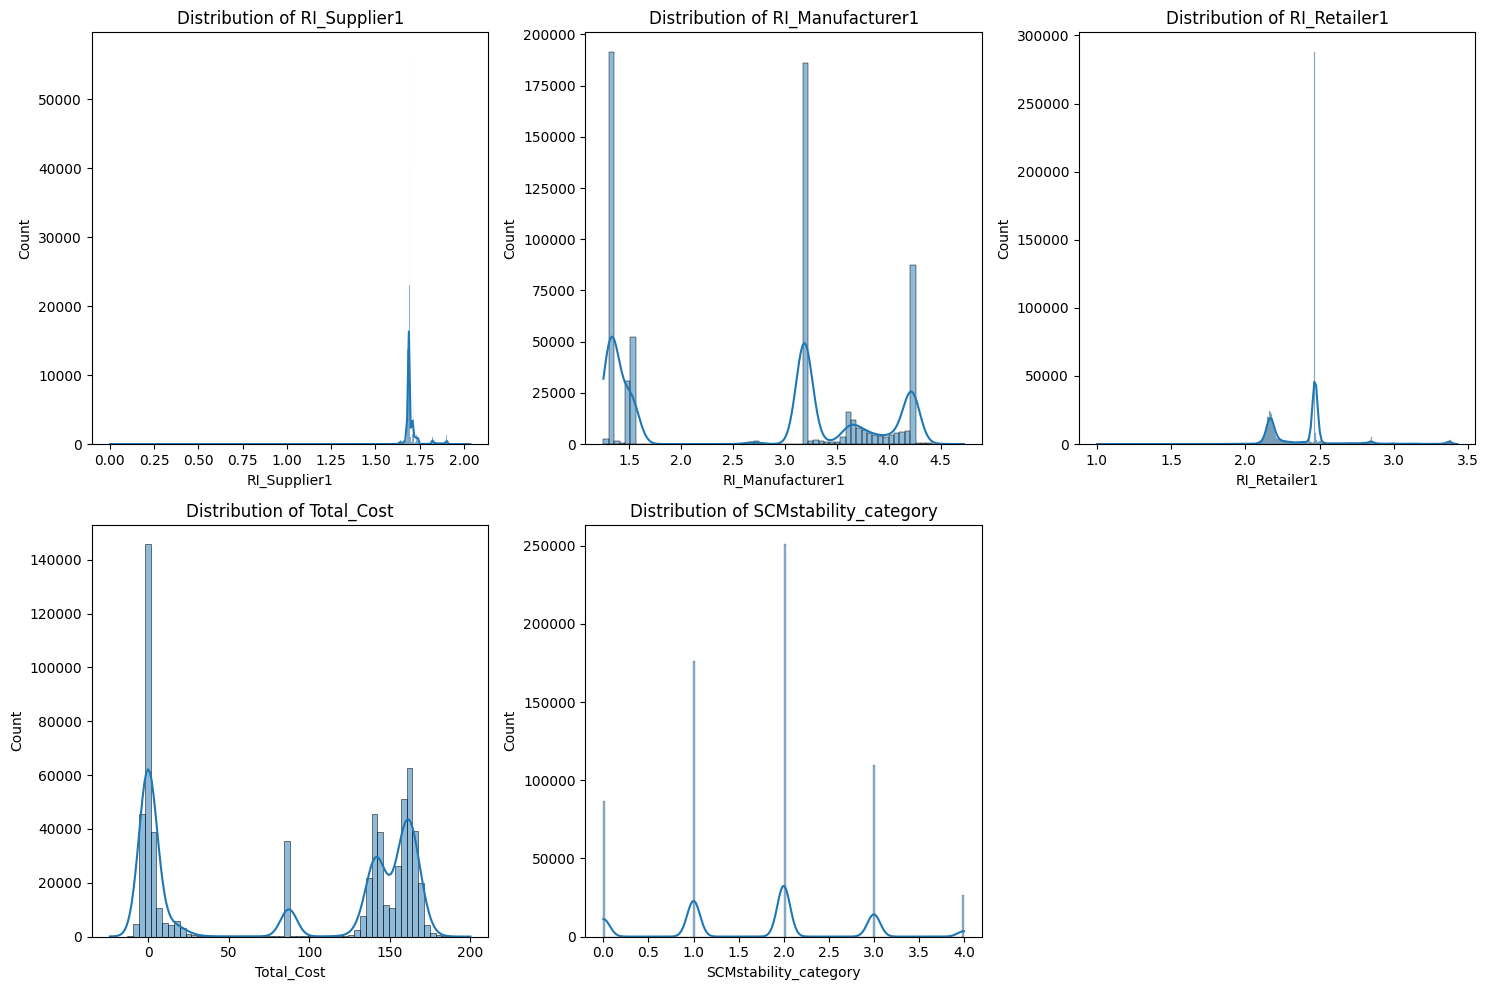

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_train.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_train[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

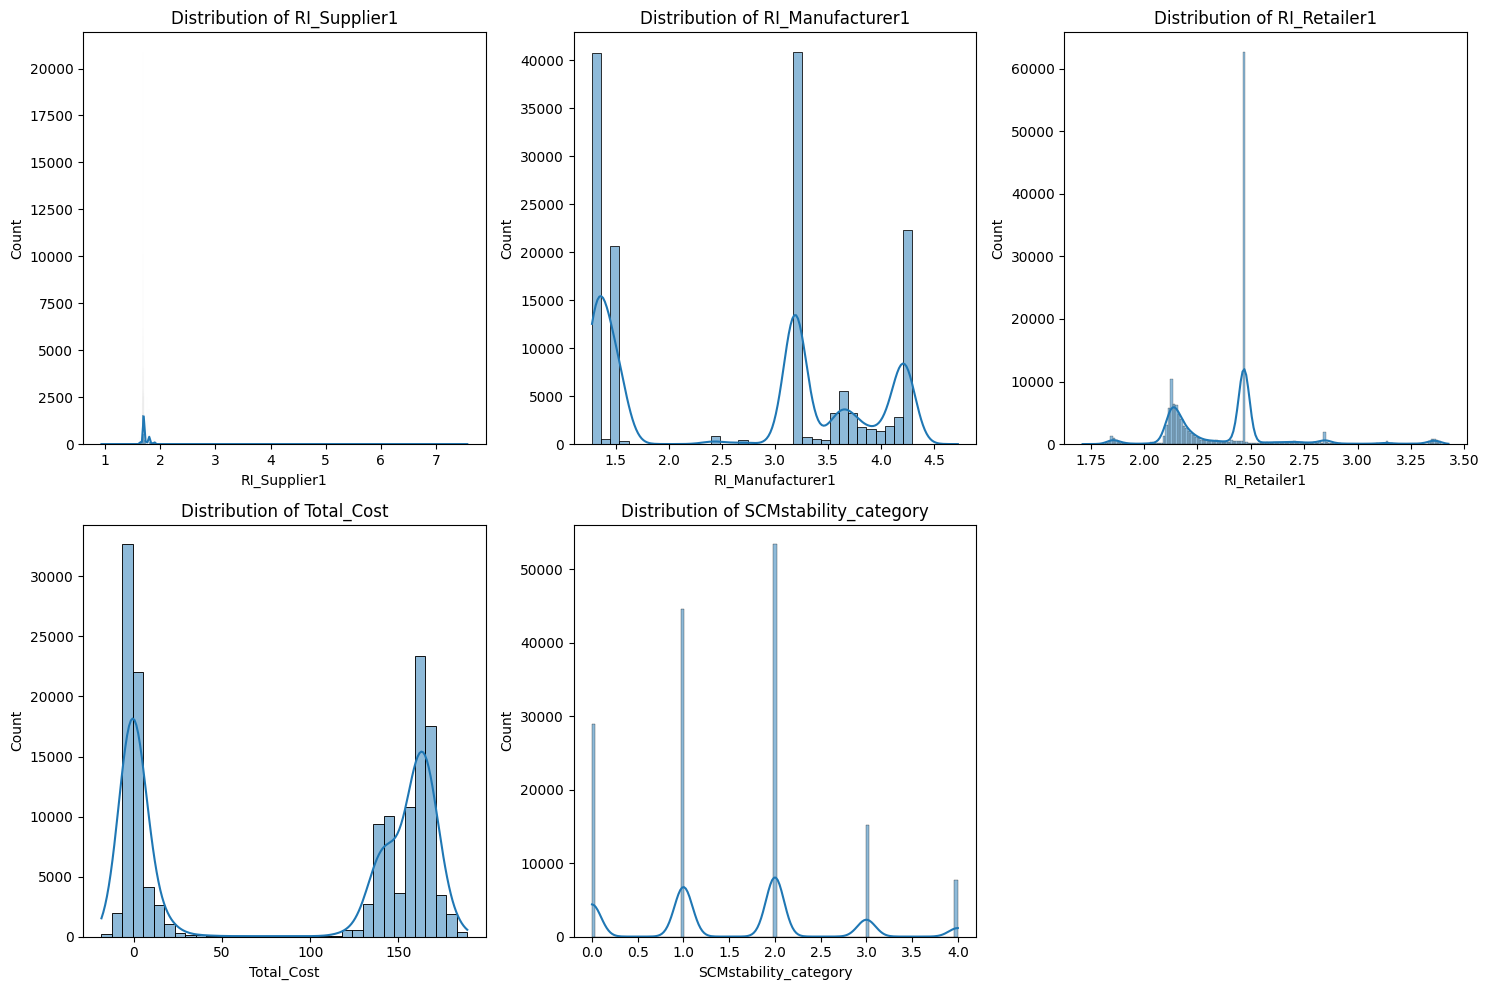

In [19]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_test.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_test[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()



# Finding Correlation between the features

In [20]:
correlation_matrix = df_train.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)




Correlation matrix:
                       RI_Supplier1  RI_Manufacturer1  RI_Retailer1  \
RI_Supplier1               1.000000          0.026158      0.155642   
RI_Manufacturer1           0.026158          1.000000      0.552099   
RI_Retailer1               0.155642          0.552099      1.000000   
Total_Cost                 0.196033          0.858710      0.566495   
SCMstability_category     -0.248761         -0.239036     -0.090438   

                       Total_Cost  SCMstability_category  
RI_Supplier1             0.196033              -0.248761  
RI_Manufacturer1         0.858710              -0.239036  
RI_Retailer1             0.566495              -0.090438  
Total_Cost               1.000000              -0.038835  
SCMstability_category   -0.038835               1.000000  


In [21]:
correlation_matrix = df_test.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)




Correlation matrix:
                       RI_Supplier1  RI_Manufacturer1  RI_Retailer1  \
RI_Supplier1               1.000000         -0.087383      0.011628   
RI_Manufacturer1          -0.087383          1.000000      0.493828   
RI_Retailer1               0.011628          0.493828      1.000000   
Total_Cost                 0.123200          0.852565      0.467521   
SCMstability_category     -0.275205         -0.269080      0.025260   

                       Total_Cost  SCMstability_category  
RI_Supplier1             0.123200              -0.275205  
RI_Manufacturer1         0.852565              -0.269080  
RI_Retailer1             0.467521               0.025260  
Total_Cost               1.000000              -0.183603  
SCMstability_category   -0.183603               1.000000  


# Plotting Heatmap

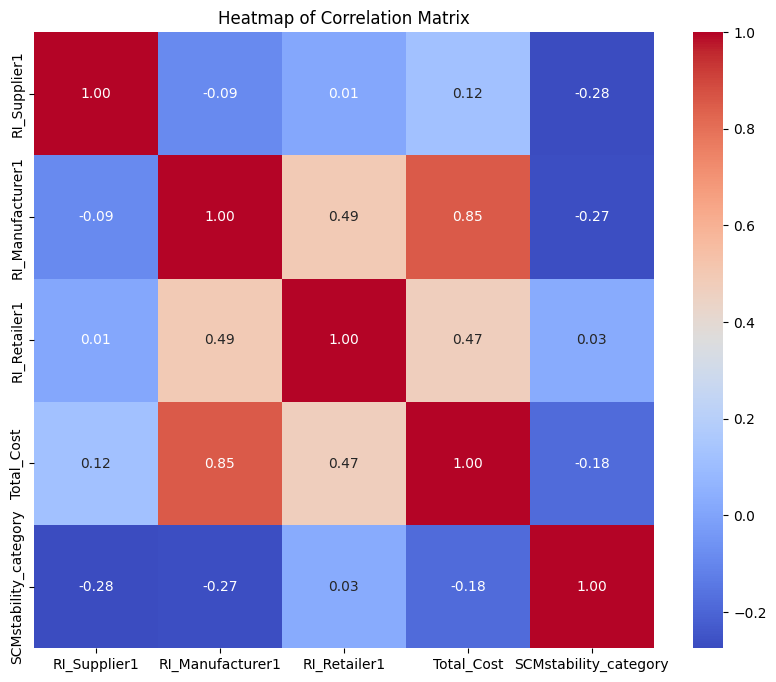

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()



# Scatter Plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x1000 with 0 Axes>

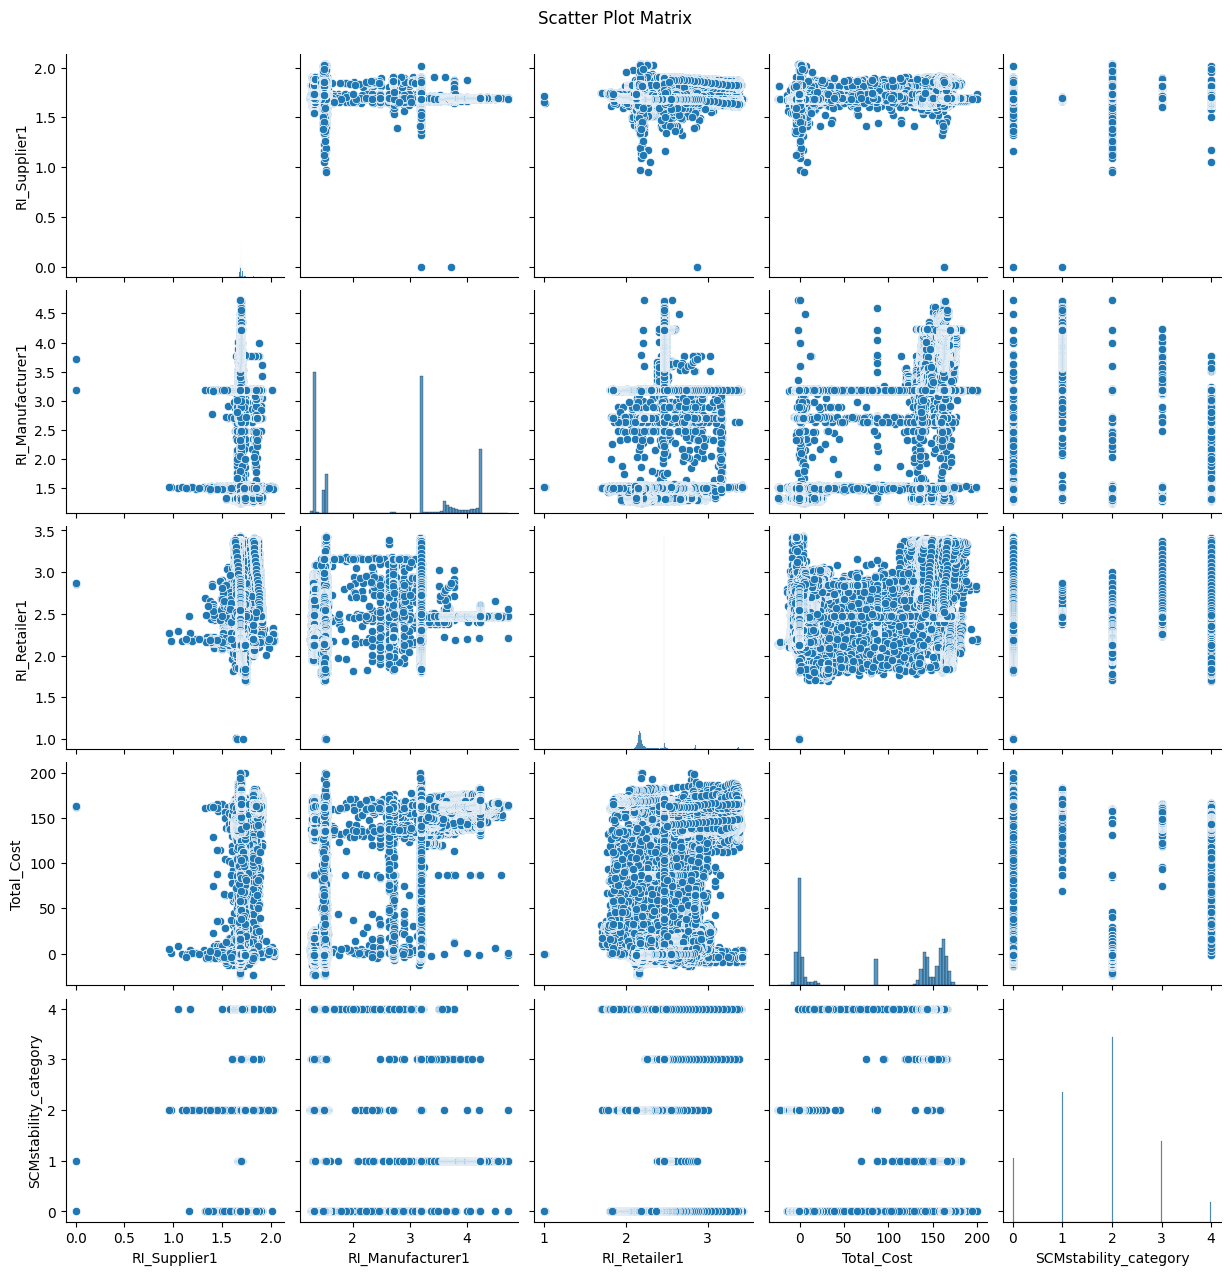

In [23]:
plt.figure(figsize=(15, 10))
sns.pairplot(df_train)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x1000 with 0 Axes>

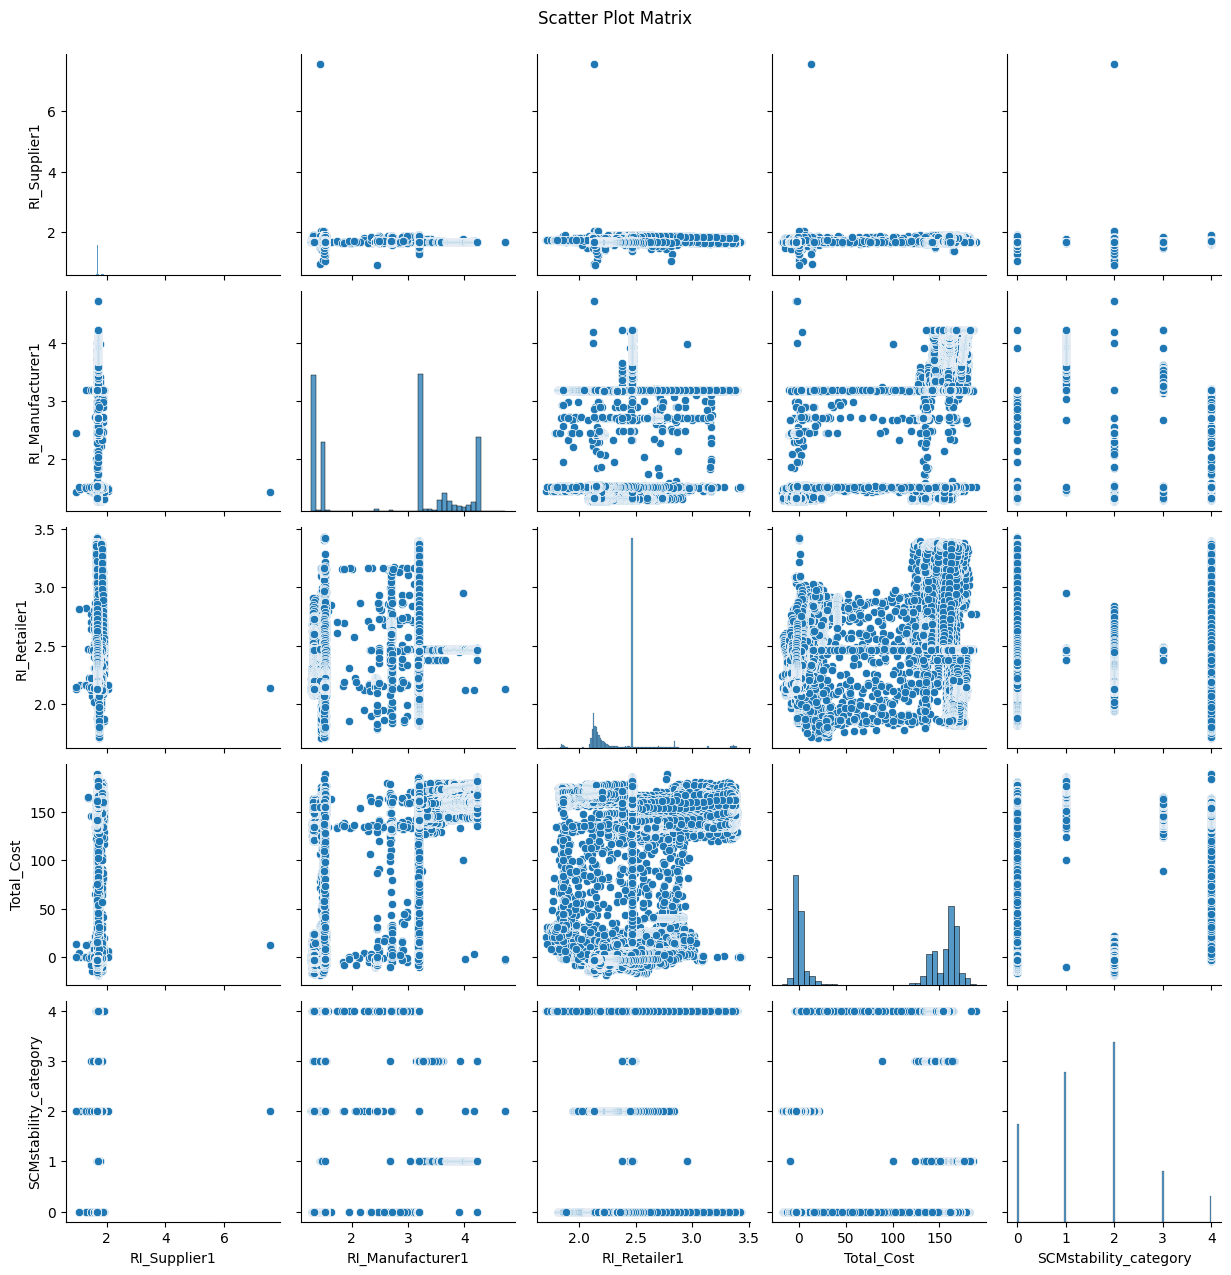

In [24]:
plt.figure(figsize=(15, 10))
sns.pairplot(df_test)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()



<Figure size 1500x800 with 0 Axes>

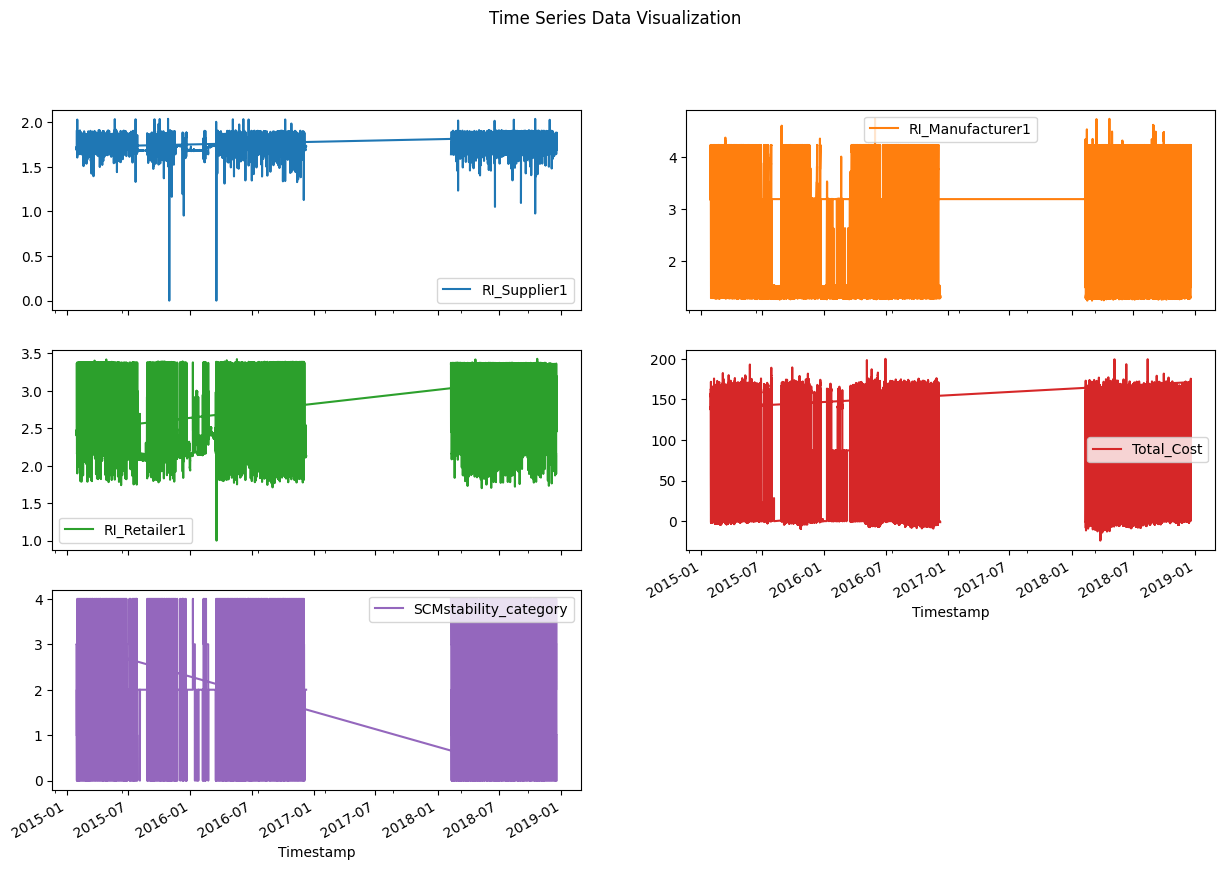

In [25]:
plt.figure(figsize=(15, 8))
df_train.plot(subplots=True, layout=(3, 2), figsize=(15, 10), sharex=True)
plt.suptitle('Time Series Data Visualization')
plt.show()


<Figure size 1500x800 with 0 Axes>

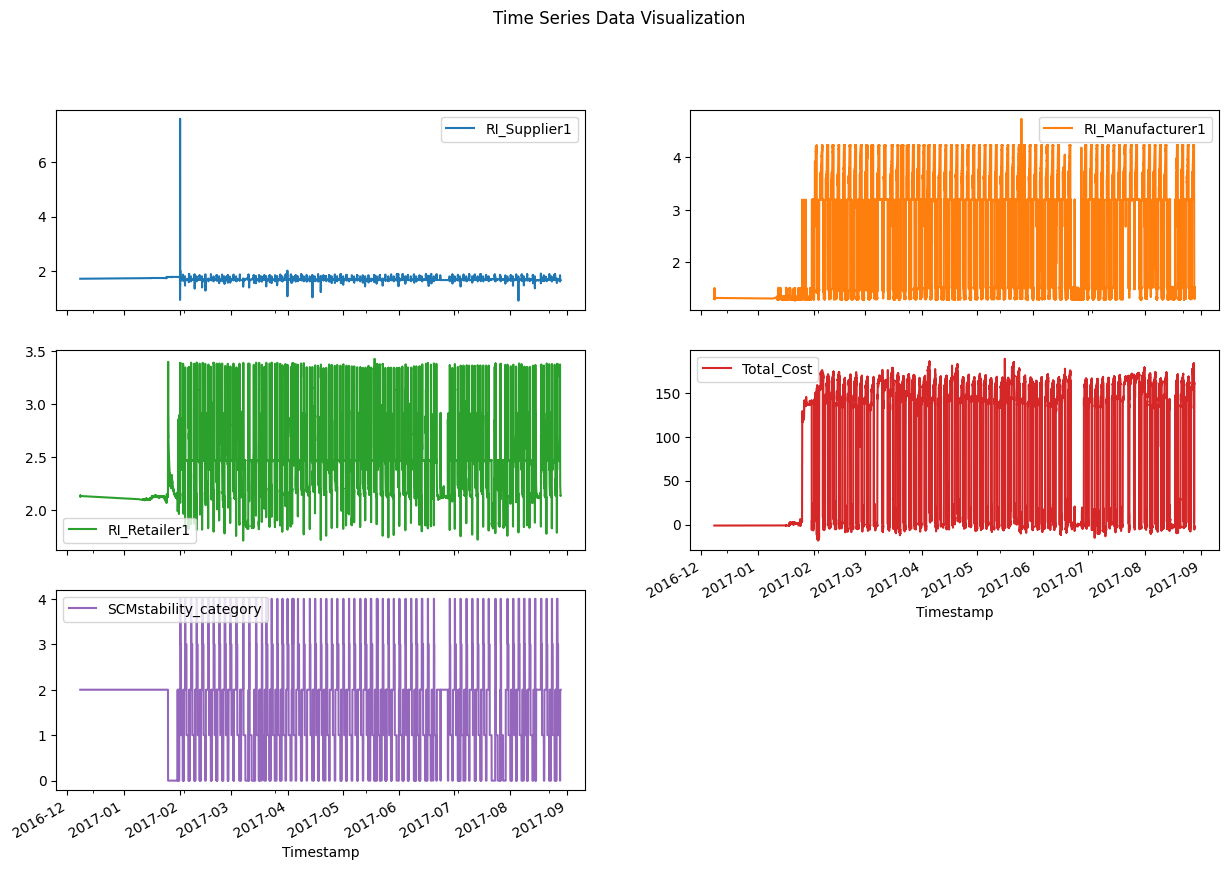

In [26]:
plt.figure(figsize=(15, 8))
df_test.plot(subplots=True, layout=(3, 2), figsize=(15, 10), sharex=True)
plt.suptitle('Time Series Data Visualization')
plt.show()


# Machine Learning Approach

In [27]:
target_variable = 'SCMstability_category'
features_train = df_train.drop(columns=[target_variable])
features_test = df_test.drop(columns=[target_variable])

In [28]:
print(target_variable)

SCMstability_category


# Scaling

In [29]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)


In [30]:
y_train = df_train[target_variable]
y_test = df_test[target_variable]


In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)


# Creating rf instance

In [32]:
rf_model.fit(features_train_scaled, y_train)



RandomForestClassifier(random_state=42)

# Creating logistc Regression instance

In [33]:
lr_model.fit(features_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
y_pred_rf = rf_model.predict(features_test_scaled)
y_pred_lr = lr_model.predict(features_test_scaled)


# Calculating Accuracy, F1 Score and Confusion Matrix via Random Forest

RandomForestClassifier Model Evaluation:
Accuracy: 0.9632
F1 Score: 0.9643
Precision: 0.9680
Recall: 0.9632
F2 Score: 0.9633
Confusion Matrix:
[[25495    22   307   264  2927]
 [   35 44587     0    59     0]
 [  786     0 52546     0    79]
 [  277   180     0 14593   164]
 [  315     0    11    97  7257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     29015
           1       1.00      1.00      1.00     44681
           2       0.99      0.98      0.99     53411
           3       0.97      0.96      0.97     15214
           4       0.70      0.94      0.80      7680

    accuracy                           0.96    150001
   macro avg       0.92      0.95      0.93    150001
weighted avg       0.97      0.96      0.96    150001



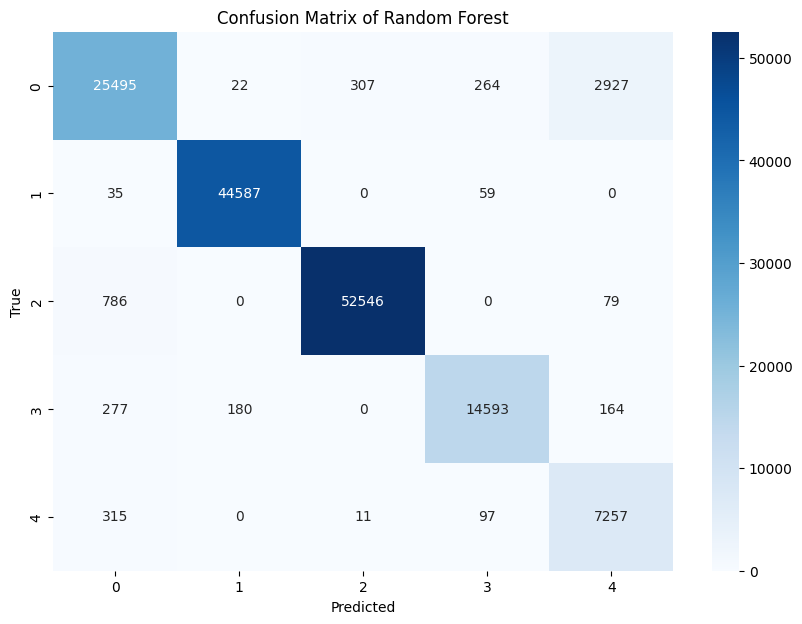

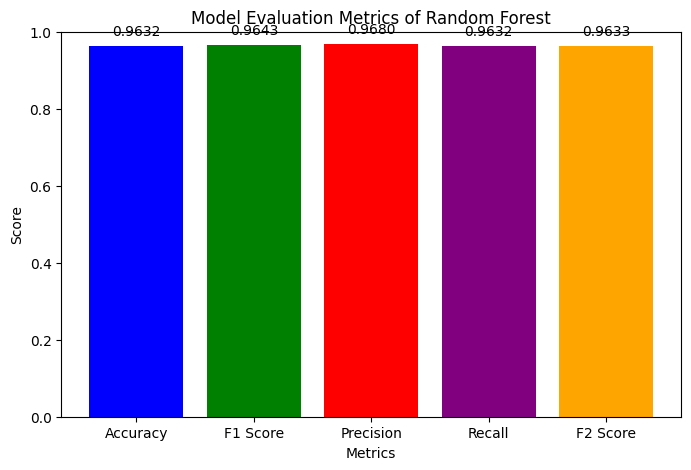

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score, fbeta_score
import seaborn as sns

# Assuming y_test and y_pred_rf are already defined
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f2 = fbeta_score(y_test, y_pred_rf, beta=2, average='weighted')

print("RandomForestClassifier Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F2 Score: {rf_f2:.4f}")
print("Confusion Matrix:")
print(rf_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Plot F1 score and accuracy
metrics = {'Accuracy': rf_accuracy, 'F1 Score': rf_f1, 'Precision': rf_precision, 'Recall': rf_recall, 'F2 Score': rf_f2}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics of Random Forest')
for i, (key, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')
plt.show()


# Calculating Accuracy, F1 Score and Confusion Matrix via Logistic Regression


LogisticRegression Model Evaluation:
Accuracy: 0.8863
F1 Score: 0.8815
Precision: 0.9070
Recall: 0.8863
Confusion Matrix:
[[16170    32  5070  7195   548]
 [    4 44202     0   475     0]
 [  982     0 52422     2     5]
 [    4   128    34 15048     0]
 [  222     0   409  1952  5097]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.56      0.70     29015
           1       1.00      0.99      0.99     44681
           2       0.90      0.98      0.94     53411
           3       0.61      0.99      0.75     15214
           4       0.90      0.66      0.76      7680

    accuracy                           0.89    150001
   macro avg       0.87      0.84      0.83    150001
weighted avg       0.91      0.89      0.88    150001



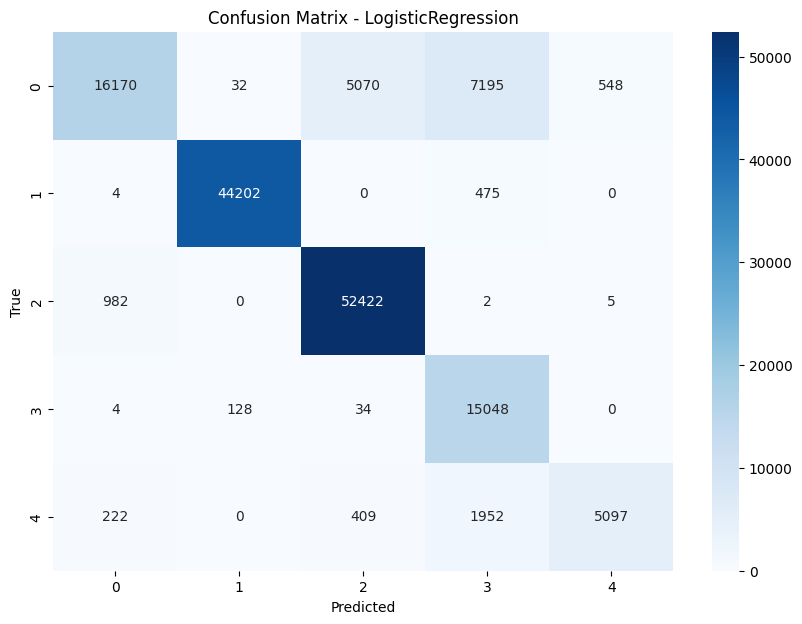

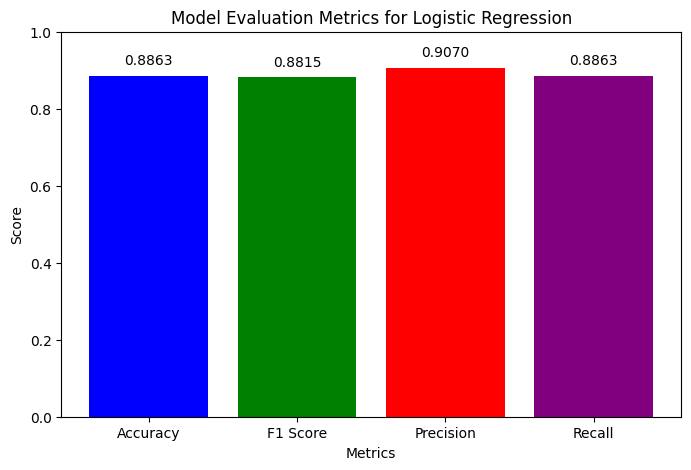

In [36]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')

print("\nLogisticRegression Model Evaluation:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print("Confusion Matrix:")
print(lr_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix for LogisticRegression
plt.figure(figsize=(10, 7))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LogisticRegression')
plt.show()


metrics = {'Accuracy': lr_accuracy, 'F1 Score': lr_f1, 'Precision': lr_precision, 'Recall': lr_recall}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics for Logistic Regression')
for i, (key, value) in enumerate(metrics.items()):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

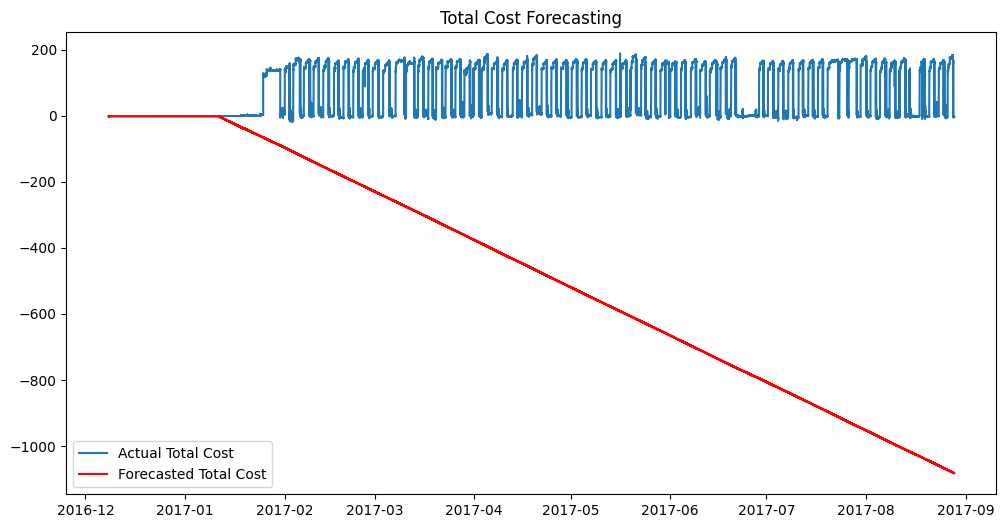

Mean Squared Error for Total Cost Forecast: 504968.0227


In [40]:

total_cost_series_train = df_train['Total_Cost']
total_cost_series_test = df_test['Total_Cost']

es_model = ExponentialSmoothing(total_cost_series_train, trend='add', seasonal='add', seasonal_periods=12).fit()

forecast = es_model.forecast(steps=len(total_cost_series_test))

plt.figure(figsize=(12, 6))
plt.plot(total_cost_series_test.index, total_cost_series_test, label='Actual Total Cost')
plt.plot(total_cost_series_test.index, forecast, label='Forecasted Total Cost', color='red')
plt.legend()
plt.title('Total Cost Forecasting')
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(total_cost_series_test, forecast)
print(f"Mean Squared Error for Total Cost Forecast: {mse:.4f}")


In [24]:
#X_train, X_test, y_train, y_test = train_test_split(features_scaled, df_train[target_variable], test_size=0.2, random_state=42, shuffle=False)



In [26]:
#X_train.shape

(519999, 5)

In [28]:
#y_train.shape

(519999,)

In [29]:
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#lr_model = LogisticRegression(max_iter=1000, random_state=42)



In [30]:
#rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [31]:
#lr_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [32]:
#y_pred_rf = rf_model.predict(X_test)


In [33]:
#y_pred_lr = lr_model.predict(X_test)


In [34]:
'''rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_cm = confusion_matrix(y_test, y_pred_rf)

print("RandomForestClassifier Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print("Confusion Matrix:")
print(rf_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))'''



RandomForestClassifier Model Evaluation:
Accuracy: 0.9718
F1 Score: 0.9726
Confusion Matrix:
[[16066    14   251    54    36]
 [    5 41210     1    32     1]
 [ 2077     0 46932     0    16]
 [  918    73     0 15982     2]
 [  161     0    10    13  6146]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     16421
           1       1.00      1.00      1.00     41249
           2       0.99      0.96      0.98     49025
           3       0.99      0.94      0.97     16975
           4       0.99      0.97      0.98      6330

    accuracy                           0.97    130000
   macro avg       0.96      0.97      0.96    130000
weighted avg       0.98      0.97      0.97    130000



In [35]:
'''# Evaluate the LogisticRegression model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
lr_cm = confusion_matrix(y_test, y_pred_lr)

print("\nLogisticRegression Model Evaluation:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print("Confusion Matrix:")
print(lr_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))'''




LogisticRegression Model Evaluation:
Accuracy: 0.9492
F1 Score: 0.9472
Confusion Matrix:
[[12373   254  2507   946   341]
 [    8 41105     7   128     1]
 [   27     0 48966    14    18]
 [  177   134   630 16031     3]
 [  147     0   393   869  4921]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     16421
           1       0.99      1.00      0.99     41249
           2       0.93      1.00      0.96     49025
           3       0.89      0.94      0.92     16975
           4       0.93      0.78      0.85      6330

    accuracy                           0.95    130000
   macro avg       0.94      0.89      0.91    130000
weighted avg       0.95      0.95      0.95    130000



/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

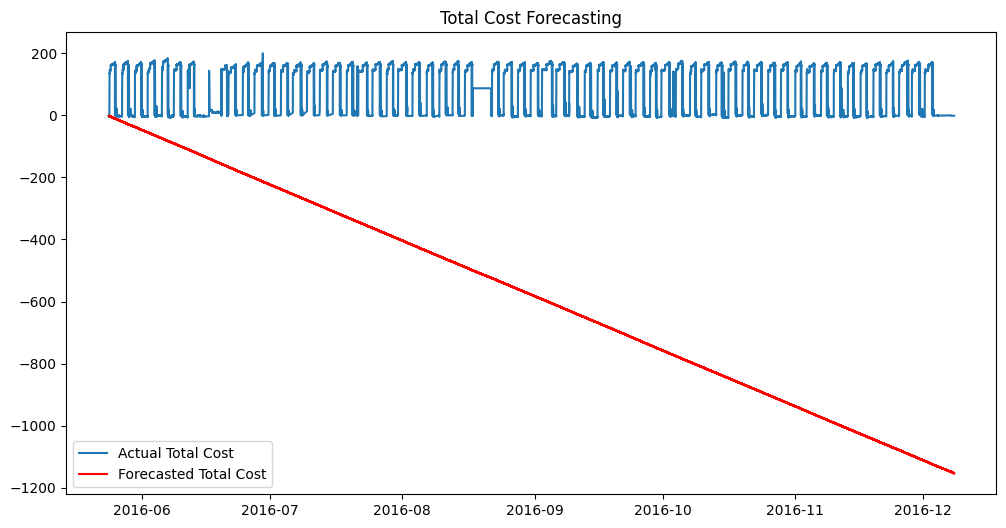

Mean Squared Error for Total Cost Forecast: 558030.5750


In [36]:
'''total_cost_series = df_train['Total_Cost']

train_size = int(len(total_cost_series) * 0.8)
train_series = total_cost_series[:train_size]
test_series = total_cost_series[train_size:]

es_model = ExponentialSmoothing(train_series, trend='add', seasonal='add', seasonal_periods=12).fit()

forecast = es_model.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label='Actual Total Cost')
plt.plot(test_series.index, forecast, label='Forecasted Total Cost', color='red')
plt.legend()
plt.title('Total Cost Forecasting')
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_series, forecast)
print(f"Mean Squared Error for Total Cost Forecast: {mse:.4f}")'''

# Deep learning Approach

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)
tf.random.set_seed(42)


2024-05-21 19:40:29.678536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 19:40:29.678681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 19:40:29.802520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Encoding Target

In [38]:
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))



# Using ANN

In [39]:
dl_model = Sequential([
    Dense(64, input_shape=(features_train_scaled.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

dl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# ANN Architecture

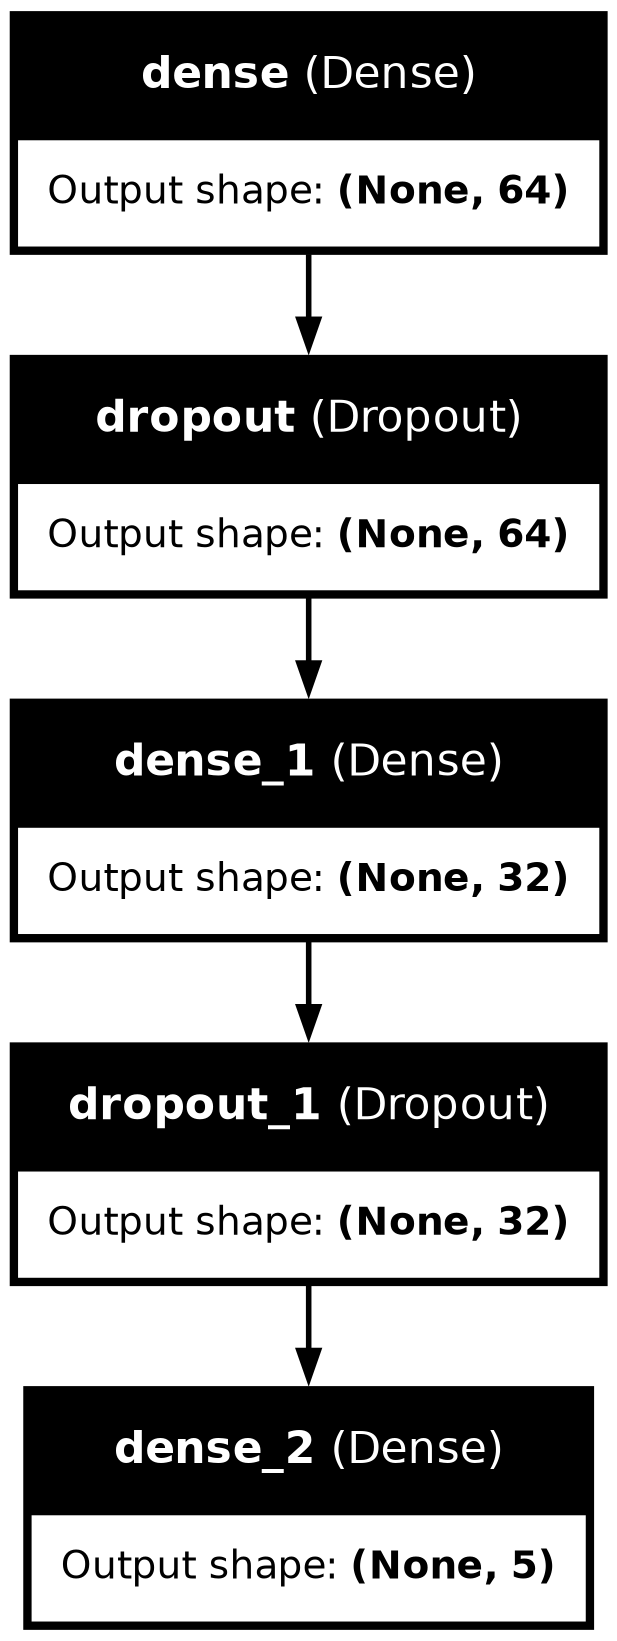

In [40]:
from keras.utils import plot_model
plot_model(dl_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [44]:

history = dl_model.fit(features_train_scaled, y_train_encoded, 
                       epochs=11, 
                       batch_size=32, 
                       validation_split=0.2, 
                       verbose=1)

Epoch 1/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9655 - loss: 0.1193 - val_accuracy: 0.9820 - val_loss: 0.5591
Epoch 2/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9657 - loss: 0.1186 - val_accuracy: 0.9814 - val_loss: 0.5004
Epoch 3/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9657 - loss: 0.1182 - val_accuracy: 0.9820 - val_loss: 0.5893
Epoch 4/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9659 - loss: 0.1179 - val_accuracy: 0.9820 - val_loss: 0.5918
Epoch 5/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9662 - loss: 0.1151 - val_accuracy: 0.9811 - val_loss: 0.6480
Epoch 6/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9662 - loss: 0.1167 - val_accuracy: 0.9816 - val_loss: 0.6344
Epoch 7/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9667 - loss: 0.1162 - val_accuracy: 0.9819 - val_loss: 0.6471
Epoch 8/11
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 

# ANN Accuracy

In [45]:
y_pred_dl_prob = dl_model.predict(features_test_scaled)
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)

# Model Evaluation
dl_accuracy = accuracy_score(y_test, y_pred_dl)
dl_f1 = f1_score(y_test, y_pred_dl, average='weighted')
dl_cm = confusion_matrix(y_test, y_pred_dl)

print("\nDeep Learning Model Evaluation:")
print(f"Accuracy: {dl_accuracy:.4f}")
print(f"F1 Score: {dl_f1:.4f}")
print("Confusion Matrix:")
print(dl_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_dl))

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 969us/step

Deep Learning Model Evaluation:
Accuracy: 0.9621
F1 Score: 0.9616
Confusion Matrix:
[[25124   103  3433   218   137]
 [   17 44415     0   249     0]
 [  544     0 52867     0     0]
 [  133   128     0 14952     1]
 [  380     0    67   272  6961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     29015
           1       0.99      0.99      0.99     44681
           2       0.94      0.99      0.96     53411
           3       0.95      0.98      0.97     15214
           4       0.98      0.91      0.94      7680

    accuracy                           0.96    150001
   macro avg       0.97      0.95      0.96    150001
weighted avg       0.96      0.96      0.96    150001



In [46]:
dl_loss, dl_accuracy = dl_model.evaluate(features_test_scaled, y_test_encoded, verbose=0)

print(f"Deep Learning Model Accuracy: {dl_accuracy:.4f}")


Deep Learning Model Accuracy: 0.9621


# ANN metrics Evaluation

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 969us/step

Deep Learning Model Evaluation:
Accuracy: 0.9621
F1 Score: 0.9616
Confusion Matrix:
[[25124   103  3433   218   137]
 [   17 44415     0   249     0]
 [  544     0 52867     0     0]
 [  133   128     0 14952     1]
 [  380     0    67   272  6961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     29015
           1       0.99      0.99      0.99     44681
           2       0.94      0.99      0.96     53411
           3       0.95      0.98      0.97     15214
           4       0.98      0.91      0.94      7680

    accuracy                           0.96    150001
   macro avg       0.97      0.95      0.96    150001
weighted avg       0.96      0.96      0.96    150001



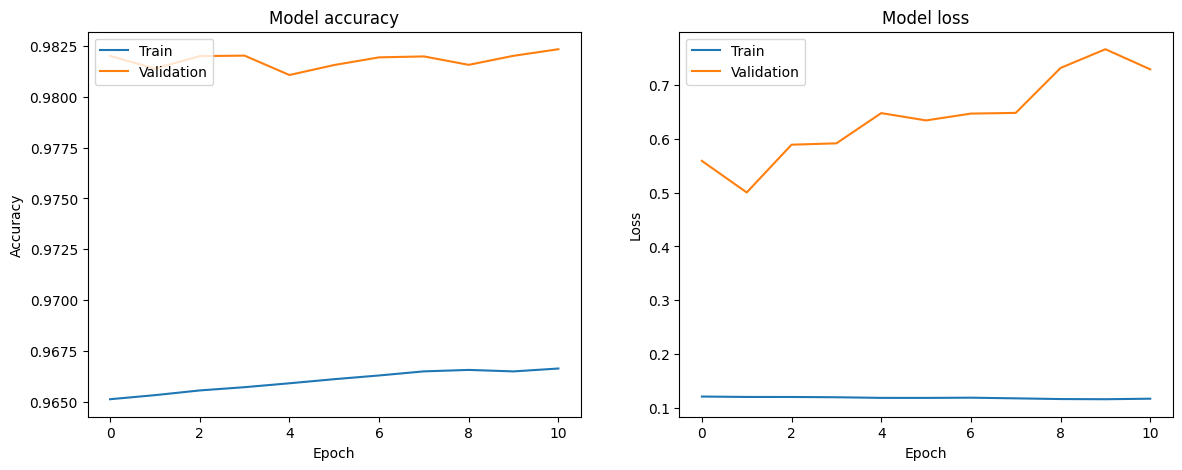

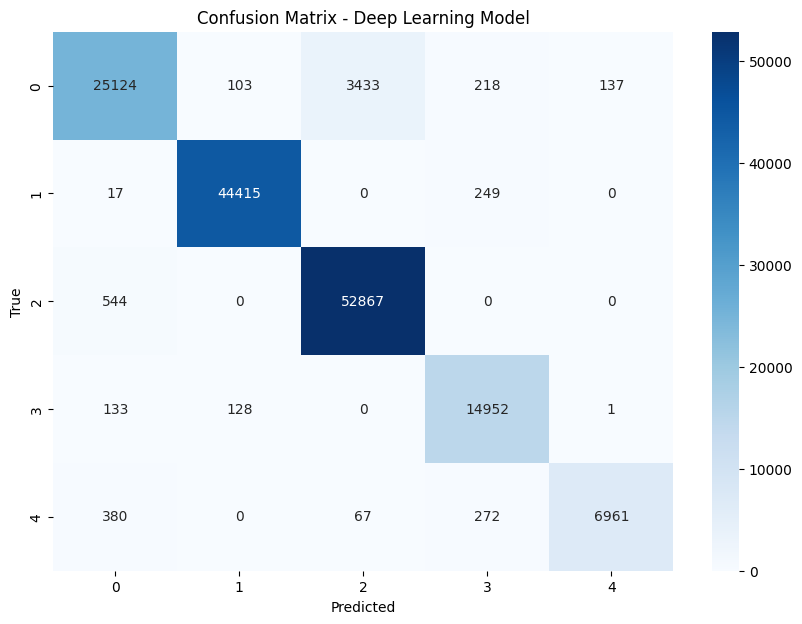

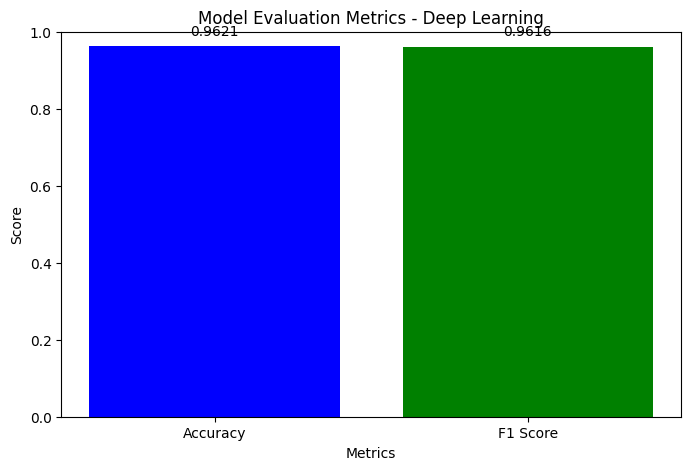

In [47]:
# Predict with the deep learning model
y_pred_dl_prob = dl_model.predict(features_test_scaled)
y_pred_dl = np.argmax(y_pred_dl_prob, axis=1)

# Convert predictions to original labels
y_pred_dl_labels = label_encoder.inverse_transform(y_pred_dl)

# Evaluate the model's predictions
dl_f1 = f1_score(y_test, y_pred_dl_labels, average='weighted')
dl_cm = confusion_matrix(y_test, y_pred_dl_labels)

print("\nDeep Learning Model Evaluation:")
print(f"Accuracy: {dl_accuracy:.4f}")
print(f"F1 Score: {dl_f1:.4f}")
print("Confusion Matrix:")
print(dl_cm)
print("Classification Report:")
print(classification_report(y_test, y_pred_dl_labels))

# Plot accuracy and loss over epochs
plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(dl_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Deep Learning Model')
plt.show()

# Plot metrics
metrics_dl = {'Accuracy': dl_accuracy, 'F1 Score': dl_f1}
plt.figure(figsize=(8, 5))
plt.bar(metrics_dl.keys(), metrics_dl.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics - Deep Learning')
for i, (key, value) in enumerate(metrics_dl.items()):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')
plt.show()


20313/20313 ━━━━━━━━━━━━━━━━━━━━ 20s 979us/step
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 979us/step


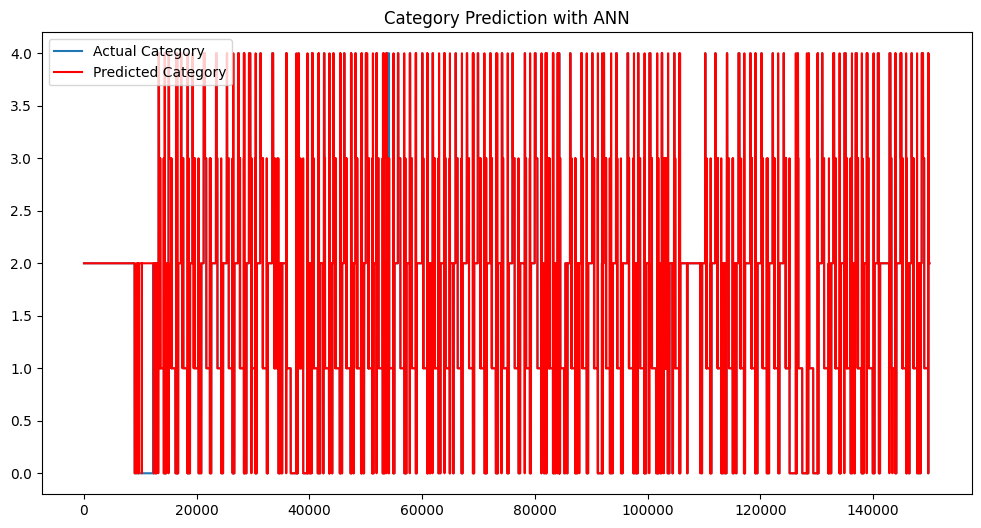


ANN Model Evaluation:
Accuracy: 0.9621
Confusion Matrix:
[[25124   103  3433   218   137]
 [   17 44415     0   249     0]
 [  544     0 52867     0     0]
 [  133   128     0 14952     1]
 [  380     0    67   272  6961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     29015
           1       0.99      0.99      0.99     44681
           2       0.94      0.99      0.96     53411
           3       0.95      0.98      0.97     15214
           4       0.98      0.91      0.94      7680

    accuracy                           0.96    150001
   macro avg       0.97      0.95      0.96    150001
weighted avg       0.96      0.96      0.96    150001



In [48]:
# Predict the categories
train_predict = dl_model.predict(features_train_scaled)
test_predict = dl_model.predict(features_test_scaled)

# Convert predictions back to original categories
train_predict_labels = label_encoder.inverse_transform(np.argmax(train_predict, axis=1))
test_predict_labels = label_encoder.inverse_transform(np.argmax(test_predict, axis=1))

# Convert true labels back to original categories
y_train_labels = label_encoder.inverse_transform(np.argmax(y_train_encoded, axis=1))
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))

# Plot actual vs predicted categories for test data
plt.figure(figsize=(12, 6))
plt.plot(y_test_labels, label='Actual Category')
plt.plot(test_predict_labels, label='Predicted Category', color='red')
plt.legend()
plt.title('Category Prediction with ANN')
plt.show()

# Evaluate the model
print("\nANN Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_labels, test_predict_labels):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_labels, test_predict_labels)}")
print(f"Classification Report:\n{classification_report(y_test_labels, test_predict_labels)}")

# Using Lstms

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler




In [56]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train[target_variable])
y_test = label_encoder.transform(df_test[target_variable])

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Create sequences for LSTM input
def create_lstm_data(features, labels, time_step=1):
    X, y = [], []
    for i in range(len(features) - time_step):
        X.append(features[i:(i + time_step)])
        y.append(labels[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X_train_lstm, y_train_lstm = create_lstm_data(features_train_scaled, y_train_encoded, time_step)
X_test_lstm, y_test_lstm = create_lstm_data(features_test_scaled, y_test_encoded, time_step)

In [57]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, features_train_scaled.shape[1])),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.5),
    Dense(25, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Using softmax for multi-class classification
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Creating 3D data format using LSTMs

# LSTM Architecture

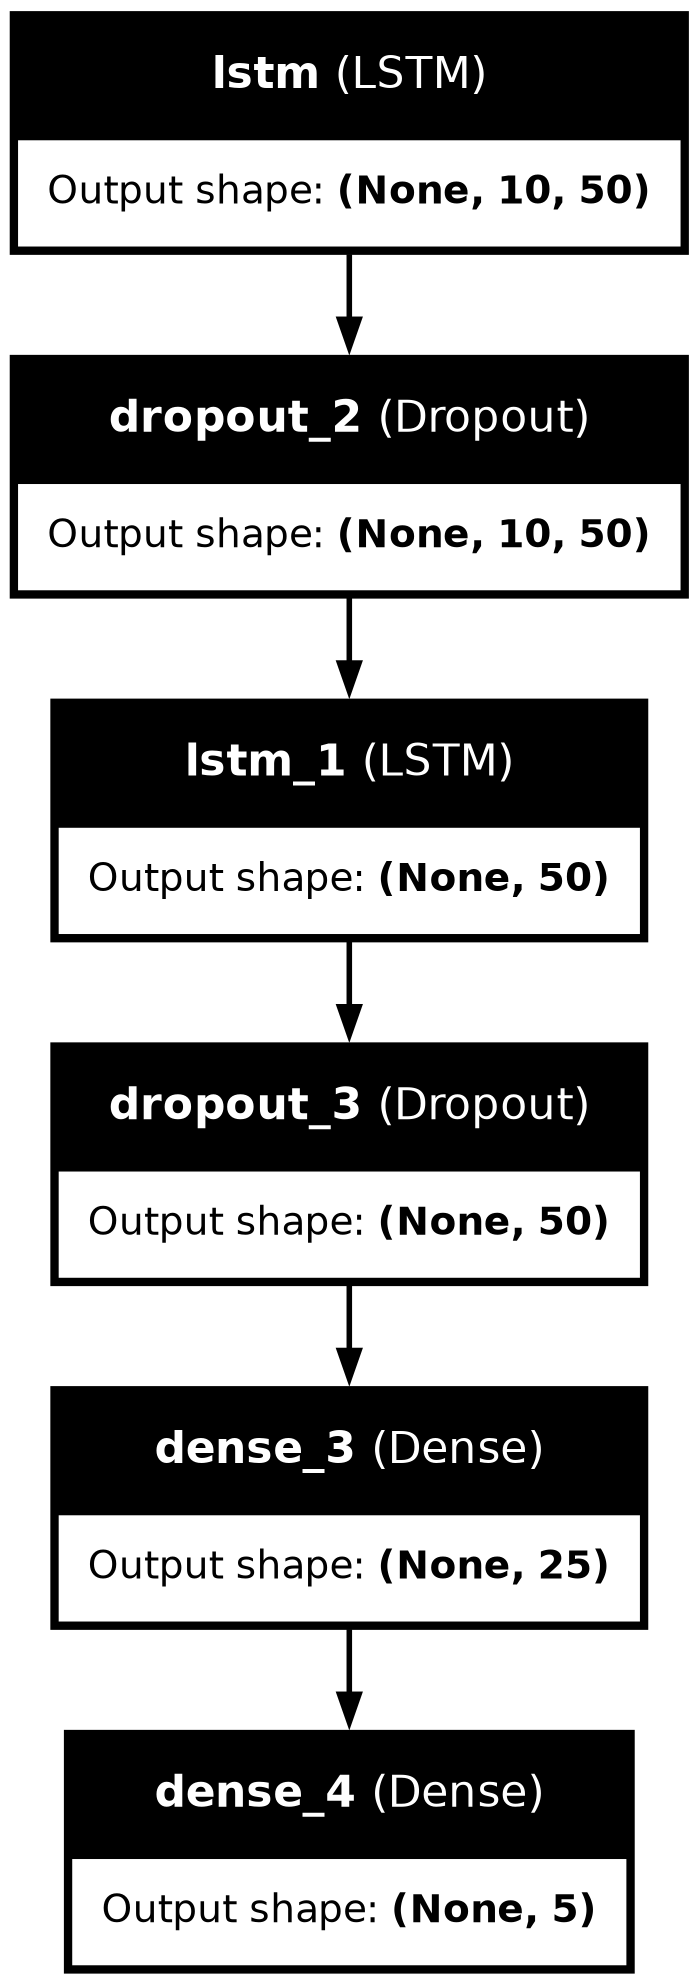

In [60]:
from keras.utils import plot_model
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

history_lstm=lstm_model.fit(X_train_lstm, y_train_lstm, 
               epochs=10, 
               batch_size=32, 
               validation_split=0.2,callbacks=[early_stopping], 
               verbose=1)



Epoch 1/10
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 163s 10ms/step - accuracy: 0.9794 - loss: 0.0654 - val_accuracy: 0.9817 - val_loss: 0.1306
Epoch 2/10
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 205s 10ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9837 - val_loss: 0.1432
Epoch 3/10
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 164s 10ms/step - accuracy: 0.9897 - loss: 0.0362 - val_accuracy: 0.9841 - val_loss: 0.1379
Epoch 4/10
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 162s 10ms/step - accuracy: 0.9910 - loss: 0.0320 - val_accuracy: 0.9859 - val_loss: 0.1445
Epoch 4: early stopping


# Plot of LSTM model

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


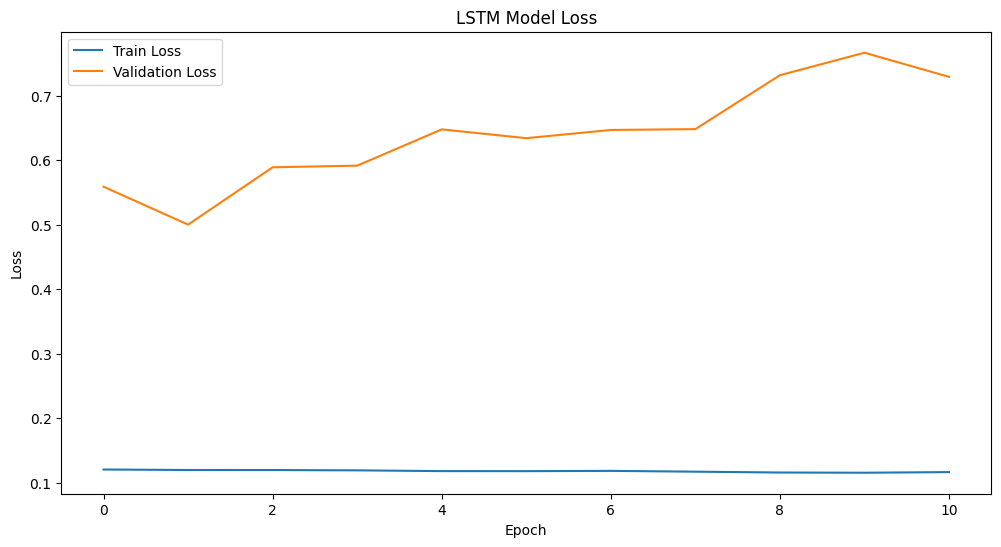

In [63]:
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)

# Predict with the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.flatten()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Combine plot of LSTM and ANN over epochs 

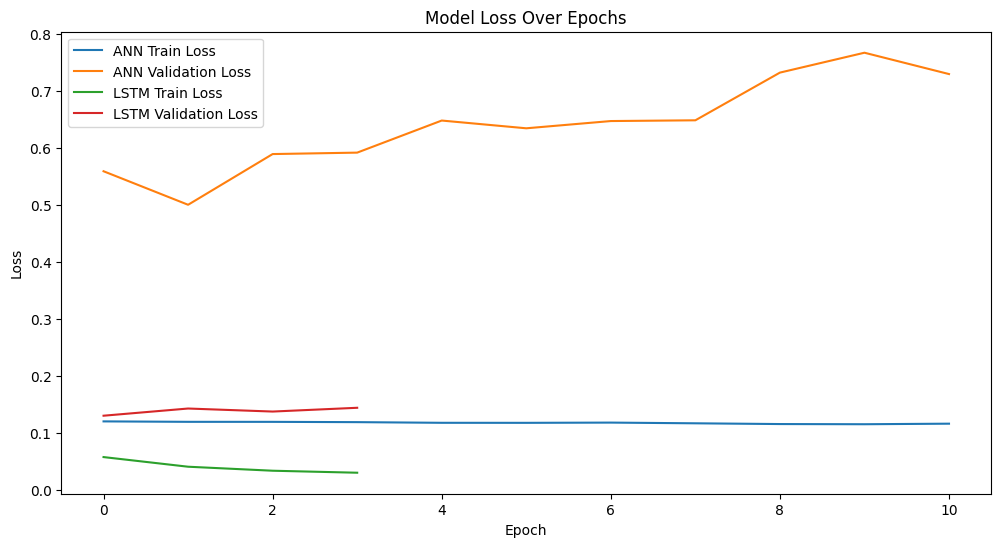

In [64]:
# Combine Sequential and LSTM loss plots
plt.figure(figsize=(12, 6))

# Plot Sequential model loss
plt.plot(history.history['loss'], label='ANN Train Loss')
plt.plot(history.history['val_loss'], label='ANN Validation Loss')

# Plot LSTM model loss
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


20313/20313 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step


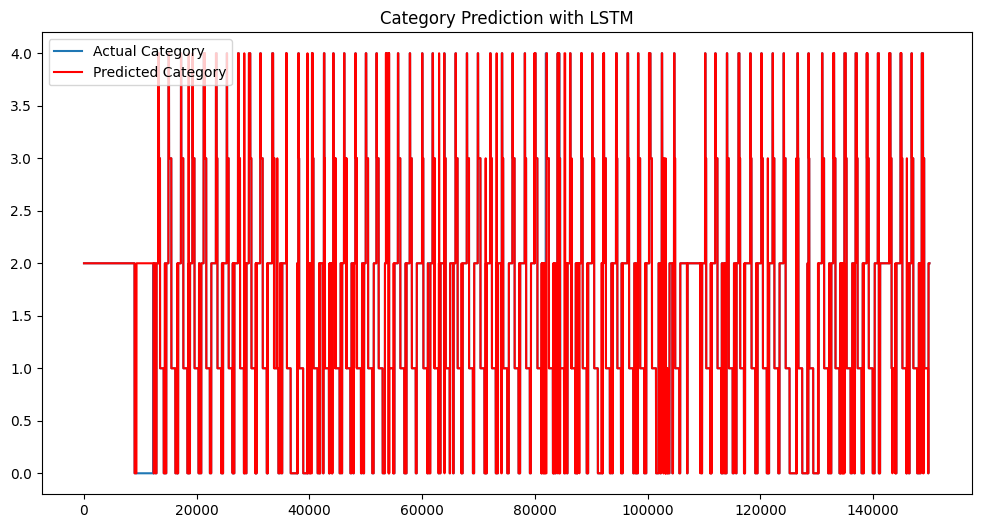


LSTM Model Evaluation:
Accuracy: 0.9587
Confusion Matrix:
[[25233    87  3507    23   165]
 [  313 44248     0   110    10]
 [ 1105     0 52270     0    26]
 [  200    67     0 14930    17]
 [  317     0   114   130  7119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     29015
           1       1.00      0.99      0.99     44681
           2       0.94      0.98      0.96     53401
           3       0.98      0.98      0.98     15214
           4       0.97      0.93      0.95      7680

    accuracy                           0.96    149991
   macro avg       0.96      0.95      0.96    149991
weighted avg       0.96      0.96      0.96    149991



In [65]:
# Predict the categories
train_predict = lstm_model.predict(X_train_lstm)
test_predict = lstm_model.predict(X_test_lstm)

# Convert predictions back to original categories
train_predict_labels = label_encoder.inverse_transform(np.argmax(train_predict, axis=1))
test_predict_labels = label_encoder.inverse_transform(np.argmax(test_predict, axis=1))

# Convert true labels back to original categories
y_train_labels = label_encoder.inverse_transform(np.argmax(y_train_lstm, axis=1))
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_lstm, axis=1))

# Plot actual vs predicted categories for test data
plt.figure(figsize=(12, 6))
plt.plot(y_test_labels, label='Actual Category')
plt.plot(test_predict_labels, label='Predicted Category', color='red')
plt.legend()
plt.title('Category Prediction with LSTM')
plt.show()

# Evaluate the model
print("\nLSTM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_labels, test_predict_labels):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_labels, test_predict_labels)}")
print(f"Classification Report:\n{classification_report(y_test_labels, test_predict_labels)}")

20313/20313 ━━━━━━━━━━━━━━━━━━━━ 115s 6ms/step
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step


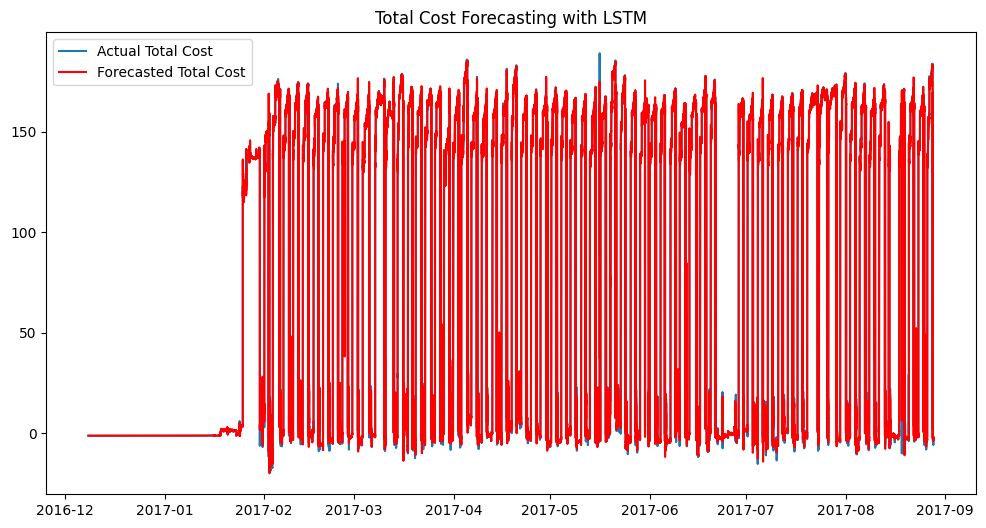

Mean Squared Error for Total Cost Forecast with LSTM: 11.1573


In [104]:
train_predict = lstm_model.predict(X_train_lstm)
test_predict = lstm_model.predict(X_test_lstm)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_lstm = scaler.inverse_transform([y_train_lstm])
y_test_lstm = scaler.inverse_transform([y_test_lstm])

plt.figure(figsize=(12, 6))
plt.plot(total_cost_series_test.index[time_step+1:], total_cost_series_test[time_step+1:], label='Actual Total Cost')
plt.plot(total_cost_series_test.index[time_step+1:], test_predict.flatten(), label='Forecasted Total Cost', color='red')
plt.legend()
plt.title('Total Cost Forecasting with LSTM')
plt.show()

lstm_mse = mean_squared_error(y_test_lstm.flatten(), test_predict.flatten())
print(f"Mean Squared Error for Total Cost Forecast with LSTM: {lstm_mse:.4f}")